In [2]:
import pandas as pd

data_macro_topics=pd.read_pickle('../data/broad_topic/broad_topic_df.pickle')

topics_dict = {
    'Technology/equipment': 'TECHNOLOGY',
    'Media/entertainment': 'TECHNOLOGY',
    'Internet and media': 'TECHNOLOGY',
    'Children': 'TECHNOLOGY',
    'Jobs & Institutions': 'JOB AND ECONOMY',
    'Finance and wealth': 'JOB AND ECONOMY',
    'Information and knowledge': 'JOB AND ECONOMY',
    'Brand/Product': 'JOB AND ECONOMY',
    'Social setting/impact': 'SOCIETY',
    'Language and communication': 'SOCIETY',
    'Family': 'SOCIETY',
    'Relationships': 'SOCIETY',
    'Culture': 'CULTURE',
    'Society & Culture': 'CULTURE',
    'Groups/Names': 'CULTURE',
    'Threat or Risk': 'VIOLENCE',
    'Insult': 'VIOLENCE',
    'Aggression and Violence': 'VIOLENCE',
    'Health Medicine': 'HEALTH',
    'Addictions/Drugs': 'HEALTH',
    'Food and drink': 'HEALTH',
    'Fitness and Skills': 'HEALTH',
    'Crime': 'LEGALITY',
    'Law and regulation': 'LEGALITY',
    'Safety': 'LEGALITY',
    'Life': 'ABSTRACT CONCEPT',
    'Death': 'ABSTRACT CONCEPT',
    'Abstraction': 'ABSTRACT CONCEPT',
    'Negative sentiments': 'ABSTRACT CONCEPT',
    'Identity': 'ABSTRACT CONCEPT',
    'Claim/Opinion': 'ABSTRACT CONCEPT',
    'Personal traits/taste': 'ABSTRACT CONCEPT',
    'Emotions': 'ABSTRACT CONCEPT',
    'Moral issues': 'ABSTRACT CONCEPT',
    'Behavior & Attitude': 'ABSTRACT CONCEPT',
    'Sexuality': 'SEXUALITY',
    'Gender': 'GENDER ISSUE',
    'Religion': 'DISCRIMINATION',
    'Race or ethnicity': 'DISCRIMINATION',
    'Racial stereotypes': 'DISCRIMINATION',
    'Locations/Geography': 'GEOPOLITICAL ISSUE',
    'Politics': 'GEOPOLITICAL ISSUE',
    'Geopolitics/National Issue': 'GEOPOLITICAL ISSUE',
    'War': 'GEOPOLITICAL ISSUE',
    'Environment': 'GEOPOLITICAL ISSUE',
    'Migration': 'GEOPOLITICAL ISSUE',
    'Time & Events': 'OTHER',
    'History': 'OTHER',
    'Animals': 'OTHER',
    'Personal tastes & Art': 'OTHER'
}


This code counts the number of conflicts among the topics: the number of rows that have two topics that are aggregated in the same feature (e.g Race or ethinicity and Religion that are both Discrimination)

In [3]:
import ast 

conflicts=0

for topics in data_macro_topics['topics']:
    aggregations=[]
    topics=ast.literal_eval(topics)
    previous_topic=''

    for t in topics:
        macro_topic=topics_dict[t]
        aggregations.append(macro_topic)

    if len(aggregations)>1 and aggregations[0]==aggregations[1]:
        conflicts=conflicts+1
        print(aggregations)
        for t in topics:
            print(t)


print("total number of sentences",len(data_macro_topics))
print("conflicts", conflicts)

['DISCRIMINATION', 'DISCRIMINATION']
Race or ethnicity
Religion
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Personal traits/taste
Identity
['DISCRIMINATION', 'DISCRIMINATION']
Racial stereotypes
Race or ethnicity
['GEOPOLITICAL ISSUE', 'GEOPOLITICAL ISSUE']
Geopolitics/National Issue
Environment
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Identity
Emotions
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Claim/Opinion
Personal traits/taste
['DISCRIMINATION', 'DISCRIMINATION']
Racial stereotypes
Race or ethnicity
['GEOPOLITICAL ISSUE', 'GEOPOLITICAL ISSUE']
Geopolitics/National Issue
Politics
['GEOPOLITICAL ISSUE', 'GEOPOLITICAL ISSUE']
Geopolitics/National Issue
Migration
['DISCRIMINATION', 'DISCRIMINATION']
Racial stereotypes
Race or ethnicity
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Personal traits/taste
Identity
['DISCRIMINATION', 'DISCRIMINATION']
Race or ethnicity
Religion
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Claim/Opinion
Personal traits/taste
['ABSTRACT CONCEPT', 'ABSTRACT CONCEPT']
Behav

In [8]:
import pandas as pd
import ast

formatted_dataset=data_macro_topics
formatted_dataset['TECHNOLOGY']=None
formatted_dataset['JOB AND ECONOMY']=None
formatted_dataset['SOCIETY']=None
formatted_dataset['CULTURE']=None
formatted_dataset['VIOLENCE']=None
formatted_dataset['HEALTH']=None
formatted_dataset['LEGALITY']=None
formatted_dataset['SEXUALITY']=None
formatted_dataset['GENDER ISSUE']=None
formatted_dataset['ABSTRACT CONCEPT']=None
formatted_dataset['DISCRIMINATION']=None
formatted_dataset['GEOPOLITICAL ISSUE']=None
formatted_dataset['OTHER']=None

print(formatted_dataset.columns)
for index, row in formatted_dataset.iterrows():
    topics=ast.literal_eval(row['topics'])
    for t in topics:
        macro_topic=topics_dict[t]
    
        row[macro_topic]= t
        formatted_dataset.iloc[index]=row

formatted_dataset.head()


Index(['text', 'sentence_number', 'topics', 'label', 'TECHNOLOGY',
       'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH',
       'LEGALITY', 'SEXUALITY', 'GENDER ISSUE', 'ABSTRACT CONCEPT',
       'DISCRIMINATION', 'GEOPOLITICAL ISSUE', 'OTHER'],
      dtype='object')


,text,sentence_number,topics,label,TECHNOLOGY,JOB AND ECONOMY,SOCIETY,CULTURE,VIOLENCE,HEALTH,LEGALITY,SEXUALITY,GENDER ISSUE,ABSTRACT CONCEPT,DISCRIMINATION,GEOPOLITICAL ISSUE,OTHER
185,social services have a love/hate relationship ...,0,"['Health Medicine', 'Jobs & Institutions']",nothate,None,Jobs & Institutions,None,None,None,Health Medicine,None,None,None,None,None,None,None
4678,Yes it's a joke and offensive isn't it? Why ar...,1,"['Gender', 'Social setting/impact']",nothate,None,None,Social setting/impact,None,None,None,None,None,Gender,None,None,None,None
9934,"I do not have passions in life, and I'm not su...",2,"['Claim/Opinion', 'Relationships']",nothate,None,None,Relationships,None,None,None,None,None,None,Claim/Opinion,None,None,None
4135,You better be. That was the most half-assed co...,3,"['Culture', 'Language and communication']",nothate,None,None,Language and communication,Culture,None,None,None,None,None,None,None,None,None
569,"Waging war on, and bombing, a foreign sovereig...",4,"['Race or ethnicity', 'War']",hate,None,None,None,None,None,None,None,None,None,None,Race or ethnicity,War,None


# NOT FINETUNED MODEL

## FALSE POSITIVE ANALYSIS

In [30]:
from divexplorer import DivergenceExplorer,DivergencePatternProcessor
from divexplorer.outcomes import get_false_positive_rate_outcome, get_accuracy_outcome, get_false_negative_rate_outcome

predictions=pd.read_csv("../data/classified_sentences/classified_sentences.csv")
predictions['text'] = predictions['text'].str.replace("^'", "", regex=True)
predictions['text'] = predictions['text'].str.replace("'$", "", regex=True)
predictions['text'] = predictions['text'].str.replace("^\"", "", regex=True)
predictions['text'] = predictions['text'].str.replace("\"$", "", regex=True)

#replace the " with ' 
predictions['text'] = predictions['text'].str.replace("\"", "'", regex=True)

final_df= pd.merge(formatted_dataset, predictions, on='text', how='inner')
""" print(len(final_df))

name_counts = predictions['text'].value_counts()

# Filter the DataFrame to remove rows where the count is 1
duplicates = predictions[predictions['text'].isin(name_counts[name_counts > 1].index)]

print(len(duplicates))
left_out_senteces= pd.merge(topics_and_labels, predictions, on ='text', how='left')
#print(topics_and_labels.iloc[192]['text'])
print(left_out_senteces[left_out_senteces['label'].isnull()].iloc[1]['text'])
"""

final_df = final_df.drop_duplicates(subset='text')
print("final length for divexplorer", len(final_df))

final_df['label'] = final_df['label_x'].apply(lambda x: 0 if x == 'nothate' else 1)
final_df = final_df.drop(columns=['label_y'])

y_trues = final_df["label"]
y_preds = final_df["prediction"]

final_df['fp'] =  get_false_positive_rate_outcome(y_trues, y_preds)


fp_diver = DivergenceExplorer(final_df)

attributes = ['TECHNOLOGY', 'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH','LEGALITY', 'SEXUALITY', 
              'GENDER ISSUE','ABSTRACT CONCEPT', 'DISCRIMINATION','GEOPOLITICAL ISSUE', 'OTHER']
FP_fm = fp_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fp'])
FP_fm = FP_fm.sort_values(by="fp_div", ascending=False, ignore_index=True)
FP_fm

final length for divexplorer 12859


,support,itemset,fp,fp_div,fp_t,length,support_count
0,0.124815,(GENDER ISSUE=Gender),0.298755,0.227507,10.831947,1,1605.0
1,0.074967,(ABSTRACT CONCEPT=Personal traits/taste),0.135831,0.064583,3.903859,1,964.0
2,0.056459,(SEXUALITY=Sexuality),0.126761,0.055512,2.542528,1,726.0
3,0.054514,(VIOLENCE=Threat or Risk),0.097800,0.026551,1.873807,1,701.0
4,0.062991,(SOCIETY=Social setting/impact),0.076923,0.005675,0.544900,1,810.0
5,0.058714,(CULTURE=Groups/Names),0.076923,0.005675,0.559548,1,755.0
6,0.201726,(DISCRIMINATION=Race or ethnicity),0.071770,0.000522,0.159622,1,2594.0
7,1.000000,(),0.071248,0.000000,0.000000,0,12859.0
8,0.050548,(DISCRIMINATION=Racial stereotypes),0.069767,-0.001481,0.129923,1,650.0
9,0.067424,(DISCRIMINATION=Religion),0.059801,-0.011447,0.607417,1,867.0


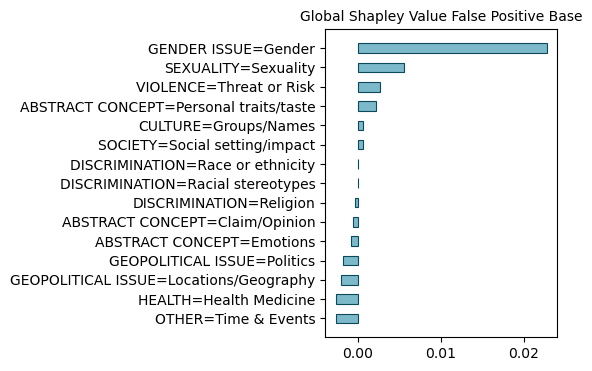

In [31]:

fp_details = DivergencePatternProcessor(FP_fm, 'fp')

# We can pick a pattern
pattern = fp_details.patterns['itemset'].iloc[0]

gsv = fp_details.global_shapley_value()
gsv
fp_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value False Positive Base')

## ACCURACY ANALYSIS


In [35]:
final_df['ac'] =  get_accuracy_outcome(y_trues, y_preds)


ac_diver = DivergenceExplorer(final_df)

attributes = ['TECHNOLOGY', 'JOB AND ECONOMY', 'SOCIETY', 'CULTURE', 'VIOLENCE', 'HEALTH','LEGALITY', 'SEXUALITY', 
              'GENDER ISSUE','ABSTRACT CONCEPT', 'DISCRIMINATION','GEOPOLITICAL ISSUE', 'OTHER']
ac_fm = ac_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['ac'])
ac_fm = ac_fm.sort_values(by="ac_div", ascending=False, ignore_index=True)

ac_fm

,support,itemset,ac,ac_div,ac_t,length,support_count
0,0.051637,(ABSTRACT CONCEPT=Emotions),0.698795,0.159795,8.695185,1,664.0
1,0.071390,(GEOPOLITICAL ISSUE=Politics),0.651416,0.112416,6.873158,1,918.0
2,0.054514,(VIOLENCE=Threat or Risk),0.627675,0.088675,4.711301,1,701.0
3,0.058714,(CULTURE=Groups/Names),0.600000,0.061000,3.313689,1,755.0
4,0.124815,(GENDER ISSUE=Gender),0.577570,0.038570,2.942110,1,1605.0
5,0.053426,(GEOPOLITICAL ISSUE=Locations/Geography),0.561863,0.022863,1.169942,1,687.0
6,0.062991,(SOCIETY=Social setting/impact),0.546914,0.007914,0.433479,1,810.0
7,0.093553,(ABSTRACT CONCEPT=Claim/Opinion),0.541978,0.002978,0.194255,1,1203.0
8,1.000000,(),0.539000,0.000000,0.000000,0,12859.0
9,0.074967,(ABSTRACT CONCEPT=Personal traits/taste),0.525934,-0.013066,0.787716,1,964.0


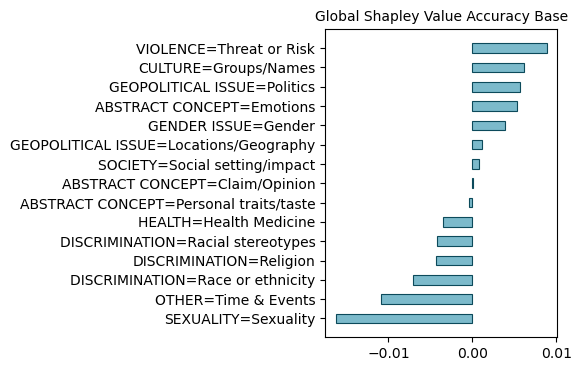

In [36]:

ac_details = DivergencePatternProcessor(ac_fm, 'ac')

# We can pick a pattern
pattern = ac_details.patterns['itemset'].iloc[0]

gsv = ac_details.global_shapley_value()

ac_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value Accuracy Base')

## FALSE NEGATIVE ANALYSIS


In [39]:

final_df['fn'] =  get_false_negative_rate_outcome(y_trues, y_preds)

fn_diver = DivergenceExplorer(final_df)

FN_fm = fn_diver.get_pattern_divergence(min_support=0.05, attributes=attributes,
                                        boolean_outcomes=['fn'])
FN_fm = FN_fm.sort_values(by="fn_div", ascending=False, ignore_index=True)
fn_details = DivergencePatternProcessor(FN_fm, 'fn')

# We can pick a pattern
pattern = fn_details.patterns['itemset'].iloc[0]


# and compute the Shapley value of the items.
sv = fn_details.shapley_value(pattern)
FN_fm

,support,itemset,fn,fn_div,fn_t,length,support_count
0,0.075278,(OTHER=Time & Events),0.885950,0.090660,6.468728,1,968.0
1,0.067424,(DISCRIMINATION=Religion),0.872792,0.077501,5.138182,1,867.0
2,0.201726,(DISCRIMINATION=Race or ethnicity),0.862735,0.067445,7.338171,1,2594.0
3,0.058792,(HEALTH=Health Medicine),0.859189,0.063898,3.519516,1,756.0
4,0.071390,(GEOPOLITICAL ISSUE=Politics),0.854701,0.059410,2.955422,1,918.0
5,0.050548,(DISCRIMINATION=Racial stereotypes),0.843678,0.048388,2.593239,1,650.0
6,0.053426,(GEOPOLITICAL ISSUE=Locations/Geography),0.843478,0.048188,2.295277,1,687.0
7,0.051637,(ABSTRACT CONCEPT=Emotions),0.840376,0.045085,1.641882,1,664.0
8,0.056459,(SEXUALITY=Sexuality),0.830409,0.035119,1.964726,1,726.0
9,0.058714,(CULTURE=Groups/Names),0.825153,0.029863,1.295552,1,755.0


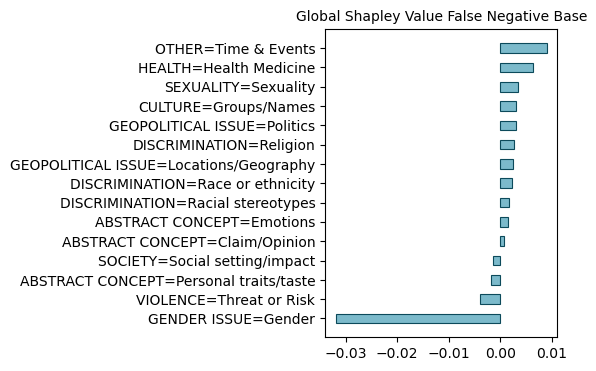

In [41]:
fn_details = DivergencePatternProcessor(FN_fm, 'fn')

# We can pick a pattern
pattern = fn_details.patterns['itemset'].iloc[0]

gsv = fn_details.global_shapley_value()
fn_details.plot_shapley_value(shapley_values=gsv, figsize=(3,4), title='Global Shapley Value False Negative Base')

In [45]:
final_df.to_csv("../data/final/final_df_bs.csv")